In [376]:
import numpy as np
import matplotlib.pyplot as plt

In [377]:
np.random.seed(0)

In [378]:
dogf_1 = np.random.normal(loc=8, scale=1.0, size=10)
dogf_2 = np.random.normal(loc=5, scale=1.0, size=10)
# print(dogf_1)
# print(dogf_2)

In [379]:
catf_1=np.random.normal(loc=5,scale=1.0,size=10)
catf_2=np.random.normal(loc=8,scale=1.0,size=10)
# print(catf_1)
# print(catf_2)

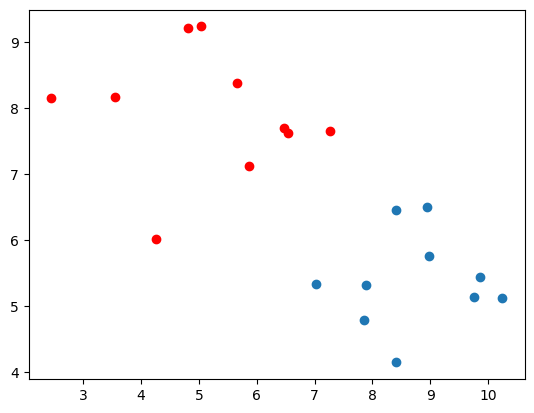

In [380]:
plt.scatter(dogf_1,dogf_2)
plt.scatter(catf_1,catf_2,color='Red')

In [381]:
def compute_err(dogs, cats, theta, theta0):
    err = 0
    for i in dogs:
        if np.dot(theta, i)+theta0 <= 0: 
        #    print(i)
           err += 1
    for j in cats:
        if np.dot(theta, j)+theta0 >= 0:
           err += 1
    return err

In [382]:
def rlc(dogs,cats,k,d):
    best_err=float('inf')
    best_theta=None
    best_theta0=None

    for _ in range(k):
        theta=np.random.normal(size=d) #[theta1 , theta2]
        theta0=np.random.normal()
        err=compute_err(dogs,cats,theta,theta0)
        
        if err<best_err:
            best_err=err
            best_theta=theta
            best_theta0=theta0
    return best_theta,best_theta0


In [383]:
# print(dogf_1)
# print(dogf_2)
dogs_data=np.vstack((dogf_1,dogf_2)).T
# print(dogs_data)
cats_data=np.vstack((catf_1,catf_2)).T
# print(cats_data)

In [384]:
k=100
d=2
best_theta,best_theta0=rlc(dogs_data,cats_data,k,d)
# print(best_theta)
# print(best_theta0)


In [385]:
x_val=np.linspace(2,10,100)
y_val=(-best_theta[0]/best_theta[1])*x_val-(-best_theta[0]/best_theta[1])

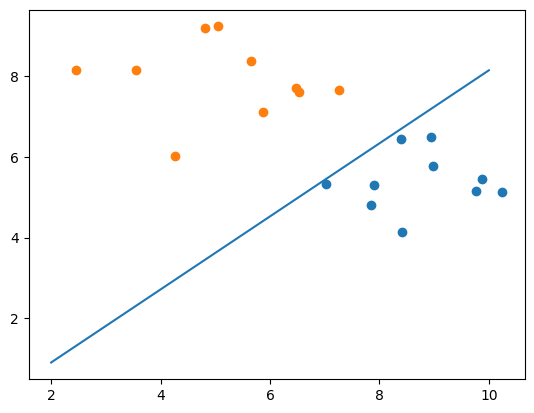

In [386]:
plt.scatter(dogf_1,dogf_2)
plt.scatter(catf_1,catf_2)
plt.plot(x_val,y_val)